Predict the maximum temperature of tommorow near Heathrow airport in London, UK.<br>
dataset from [1979-01-01 to 2020-12-30]

Features:

date - recorded date of measurement - (int)<br>
cloud_cover - cloud cover measurement in oktas - (float)<br>
sunshine - sunshine measurement in hours (hrs) - (float)<br>
global_radiation - irradiance measurement in Watt per square meter (W/m2) - (float)<br>
max_temp - maximum temperature recorded in degrees Celsius (°C) - (float)<br>
mean_temp - mean temperature in degrees Celsius (°C) - (float)<br>
min_temp - minimum temperature recorded in degrees Celsius (°C) - (float)<br>
precipitation - precipitation measurement in millimeters (mm) - (float)<br>
pressure - pressure measurement in Pascals (Pa) - (float)<br>
snow_depth - snow depth measurement in centimeters (cm) - (float)<br>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('london_weather.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
df.ffill(inplace=True) # fill the missing values with the previous value

In [4]:
df.isnull().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [5]:
df.dtypes


date                  int64
cloud_cover         float64
sunshine            float64
global_radiation    float64
max_temp            float64
mean_temp           float64
min_temp            float64
precipitation       float64
pressure            float64
snow_depth          float64
dtype: object

In [6]:
df["year"]=df['date'].astype('str').str[:4]
df["month"]=df['date'].astype('str').str[4:6]
df["day"]=df['date'].astype('str').str[6:8]

In [7]:
# just in case if there is gaps
df["year"].value_counts()

year
2000    366
1988    366
2016    366
2012    366
2008    366
2004    366
1980    366
1996    366
1992    366
2020    366
1984    366
1989    365
2006    365
2019    365
2018    365
2017    365
1981    365
2015    365
2014    365
2013    365
1982    365
2011    365
2010    365
2009    365
1983    365
2007    365
2005    365
1990    365
2003    365
2002    365
2001    365
1985    365
1999    365
1998    365
1997    365
1986    365
1995    365
1994    365
1993    365
1987    365
1991    365
1979    365
Name: count, dtype: int64

In [8]:
df.drop(columns=["date"], inplace=True)
df.drop(columns=["year"], inplace=True)


In [9]:
df


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,month,day
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,01,01
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,01,02
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,01,03
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,01,04
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,01,05
...,...,...,...,...,...,...,...,...,...,...,...
15336,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,0.0,12,27
15337,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,0.0,12,28
15338,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,0.0,12,29
15339,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,0.0,12,30


we can predict all but maybe complex so we predict next day temp only[tmax]

In [10]:
df["tommorow_temp"] = df["max_temp"].shift(-1) # shift(-1) shifts the column up by 1 which is our future values

In [11]:
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,month,day,tommorow_temp
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,01,01,1.6
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,01,02,1.3
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,01,03,-0.3
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,01,04,5.6
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,01,05,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...
15336,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,0.0,12,27,3.6
15337,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,0.0,12,28,4.1
15338,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,0.0,12,29,5.6
15339,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,0.0,12,30,1.5


In [12]:
# handle last temperature data
df.ffill(inplace=True) #we dont have last future data after shift so we fill it with 2-last data

In [13]:
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,month,day,tommorow_temp
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,01,01,1.6
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,01,02,1.3
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,01,03,-0.3
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,01,04,5.6
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,01,05,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...
15336,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,0.0,12,27,3.6
15337,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,0.0,12,28,4.1
15338,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,0.0,12,29,5.6
15339,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,0.0,12,30,1.5


In [14]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

# choose the algo
model=linear_model.LinearRegression()

# model=RandomForestRegressor(n_estimators=100)


In [15]:
# dividng feature and traget .basically feature is except tommorow_temp
weather_X=df.drop(columns='tommorow_temp')
weather_Y=df['tommorow_temp']



In [16]:

from sklearn.model_selection import train_test_split
weather_X_train, weather_X_test, weather_Y_train, weather_Y_test = train_test_split(weather_X, weather_Y, test_size=0.2, random_state=3)

# weather_X_train

In [17]:

model.fit(weather_X_train,weather_Y_train)

LinearRegression()

In [18]:
predicted_Y=model.predict(weather_X_test)
predicted_Y


array([11.95432632, 20.30673065, 17.46673154, ..., 12.17257795,
       21.17197099, 14.5949322 ])

In [19]:
result_df=pd.DataFrame(columns=['actual', 'predicted'])

In [20]:
result_df["actual"]=weather_Y_test
result_df["predicted"]=predicted_Y
result_df["difference"]=abs((result_df["actual"]-result_df["predicted"])/result_df["actual"])
result_df

,actual,predicted,difference
1756,13.4,11.954326,0.107886
5987,20.6,20.306731,0.014236
4538,16.1,17.466732,0.084890
2405,17.4,19.240729,0.105789
12913,17.9,15.883044,0.112679
...,...,...,...
10282,10.8,10.547534,0.023376
2829,19.0,16.092987,0.153001
2667,10.6,12.172578,0.148356
11206,28.1,21.171971,0.246549


In [21]:
from sklearn.metrics import mean_squared_error,r2_score
mse= mean_squared_error(weather_Y_test, predicted_Y)
r2=r2_score(weather_Y_test, predicted_Y)

In [22]:
mse= mean_squared_error(weather_Y_test, predicted_Y)
r2=r2_score(weather_Y_test, predicted_Y)

In [23]:
print("mse:",mse)
print("scores:",r2)

mse: 5.64710526081264
scores: 0.8655127463938491


In [24]:
# random forest
# mse: 6.006939461795375
# scores: 0.8611210577056861

# linear regression
# mse: 5.64710526081264
# scores: 0.8655127463938491

In [25]:
#save the model
import pickle

with open('weather_model.pkl','wb') as f:
    pickle.dump(model,f)


In [26]:
#load the model
model = pickle.load(open('weather_model.pkl','rb'))


In [27]:
# cloud_cover=8.0
# sunshine=0
# global radiation=13
# high_temp=5.2
# mean=1.4
# low=-1.7
# pre=0.6
# pressure=101170
# snow=0
# month=01
# day=01
# 2021

In [28]:
# data from 2021-01-01
# [8.0,0,13.0,5.2,1.4,-1.7,0.6,101170.0,0,01,01]

In [29]:
model.predict([[8.0,0,13.0,5.2,1.4,-1.7,0.6,101170.0,0,1,1]])[0]
# here we predict the max temp of 2021-01-02 based on temp of 2021-01-01
# run below code to see the evidence

d:\ml\new\ml\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


5.39454352184044

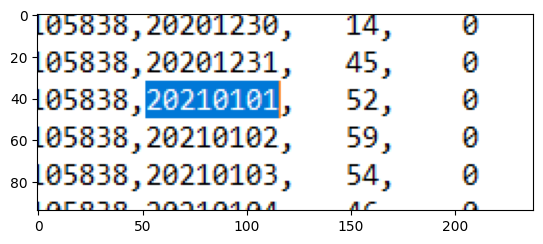

In [30]:

# importing Image class from PIL package
from PIL import Image
im = Image.open("report.png")
plt.imshow(im)

In [31]:
# its 5.9 in jan 2 but predicted 5.3. Almost lol maybe it has 86% accuracy
# test with other data: https://www.ecad.eu/dailydata/customquery.php?optionSelected=element&processtext1=Your+query+is+being+processed.+Please+wait...&blendingselect=no&countryselect=UNITED+KINGDOM%7Cgb&stationselect=HEATHROW%5Bgb%5D%7C1860&elementselect=Snow+depth%7Csd&processtext2=Your+query+is+being+processed.+Please+wait...